In [1]:
import sys
sys.path.insert(0, '..')

import torch
import torch.nn as nn

import matplotlib.pyplot as plt

from os import listdir
from os.path import join
from train_cvppp import evaluate

import deepcoloring as dc

%matplotlib inline
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In order to run this example you need to download dataset https://www.plant-phenotyping.org/datasets-download

In [2]:
!wget https://www.dropbox.com/s/whwzh9pdbk69o7x/cvppp_model.t7 -O model.t7

--2018-07-30 09:47:31--  https://www.dropbox.com/s/whwzh9pdbk69o7x/cvppp_model.t7
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.1, 2620:100:6022:1::a27d:4201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/whwzh9pdbk69o7x/cvppp_model.t7 [following]
--2018-07-30 09:47:32--  https://www.dropbox.com/s/raw/whwzh9pdbk69o7x/cvppp_model.t7
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca960b13d222a65ac2565ddf98b.dl.dropboxusercontent.com/cd/0/inline/AMr5P9n2MGT6KX3DwGgytDVG2IcHdgbEBfL7I3VvAUIiTn7FB6lUH2BsGoO1sdNli9wb7R6f8l3cv0vXvumiafVNw6vZHt2Hw2DgYhL2ve1ouO8iYsDpelQPCYVQid8Mskb1roJWtWDdXrEEhPPQPgpZiofc9ggLp29b2Q2uOQk50vqUHLArw8oT8UlnCnKuWfY/file [following]
--2018-07-30 09:47:32--  https://uca960b13d222a65ac2565ddf98b.dl.dropboxusercontent.com/cd/0/inline/AMr5P9n2MGT6KX3DwGgytDVG2IcHdgbEBfL7I3VvAU

In [5]:
net = dc.EUnet(3, 9, 4, 3, 1, depth=3, padding=1, init_xavier=True, use_bn=False, use_dropout=True).to(device)
net.load_state_dict(torch.load("model.t7"))
net.eval()
print("Model loaded")

Model loaded


(<matplotlib.figure.Figure at 0x7f009f752410>,
 <matplotlib.figure.Figure at 0x7f0064132390>)

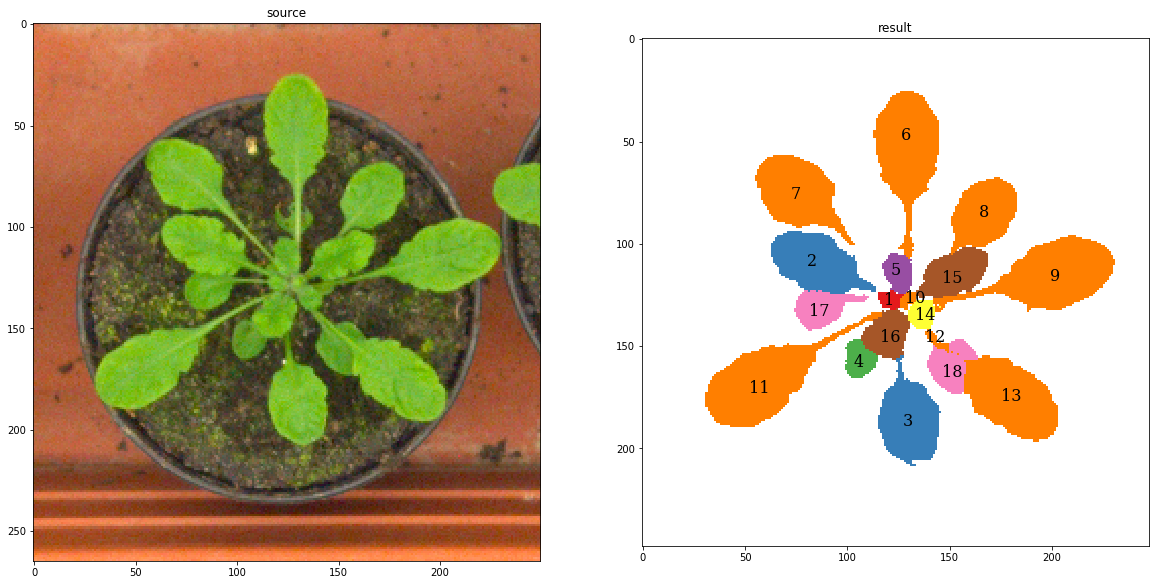

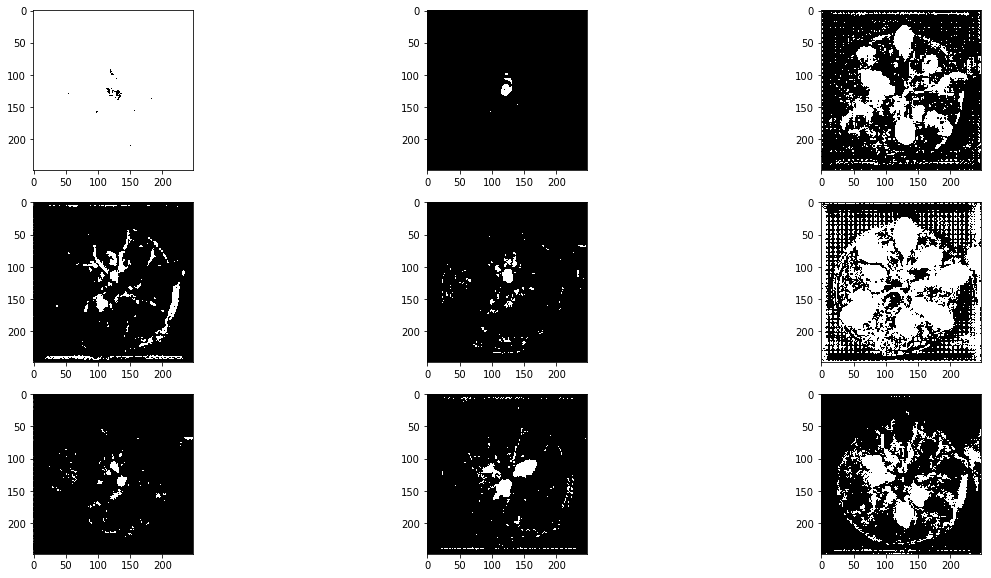

In [8]:
from skimage.io import imread
xo = imread("../images/plant050_rgb.png")[::2,::2]

x = dc.rgba2rgb()(xo, True)
x = dc.normalize(0.5, 0.5, )(x, True)
x = x.transpose(2, 0, 1)[:, :248, :248]

vx = torch.from_numpy(np.expand_dims(x, 0)).to(device)
p = net(vx)
p_numpy = p.detach().cpu().numpy()[0]
dc.visualize(xo[:,:,:3],p_numpy,40)